# Calculation of the detonation velocity of the methane-air mixture in constant volume for variable initial parameters

## Sources:
* SDToolbox documentation and code examples
<ol>
http://shepherd.caltech.edu/EDL/public/cantera/html/SD_Toolbox/<br>
</ol>
* Matplotlib library documentation
<ol>
https://matplotlib.org/tutorials/index.html
</ol>
* Numpy library documentation
<ol>
https://docs.scipy.org/doc/numpy/user/quickstart.html 
</ol>

## Importing neccesery libraries

In [1]:
import math
import SDToolbox as sd
import numpy as np
import matplotlib.pyplot as plt

## Model inputs 

In [2]:
p_start = 100000.0;
p_end = 1000000.0;
T_start = 300.0;
T_end = 1000.0;
phi_start = 0.5;
phi_end = 1.5;
p_steps = 10;
T_steps = 7;
phi_steps = 11;

## Setting up gas reaction mechanisms

In [3]:
mech = 'gri30.cti';   
sd.gas  = sd.Solution(mech); 

## Creating data arrays

In [4]:
p1 = np.zeros(p_steps);
p1bar = np.zeros(p_steps);
T1 = np.zeros(T_steps);
phi = np.zeros(phi_steps);
cj_speed = np.zeros((p_steps, T_steps, phi_steps));

## Simulation loop

In [5]:
p_index = 0;
T_index = 0;
phi_index = 0;

while p_index < p_steps:
    
    p1[p_index] = p_start + p_index*(p_end - p_start)/(p_steps - 1);
    p1bar[p_index] = p1[p_index]/100000;
    
    while T_index < T_steps:
        
        T1[T_index] = T_start + T_index*(T_end - T_start)/(T_steps - 1);
        
        while phi_index < phi_steps:
            
            phi[phi_index] = phi_start + phi_index*(phi_end - phi_start)/(phi_steps - 1);
            x = 'CH4:%.2f O2:2.0 N2:7.52' % phi[phi_index];
            sd.gas.TPX = T1[T_index],p1[p_index],x;
            [cj_speed[p_index,T_index,phi_index],gas] = sd.cv_CJ(0, p1[p_index], T1[T_index], x, mech, 0);
            phi_index += 1;
        
        T_index += 1;
        phi_index = 0;
    
    p_index += 1;
    T_index = 0;
    phi_index = 0;

## Plotting

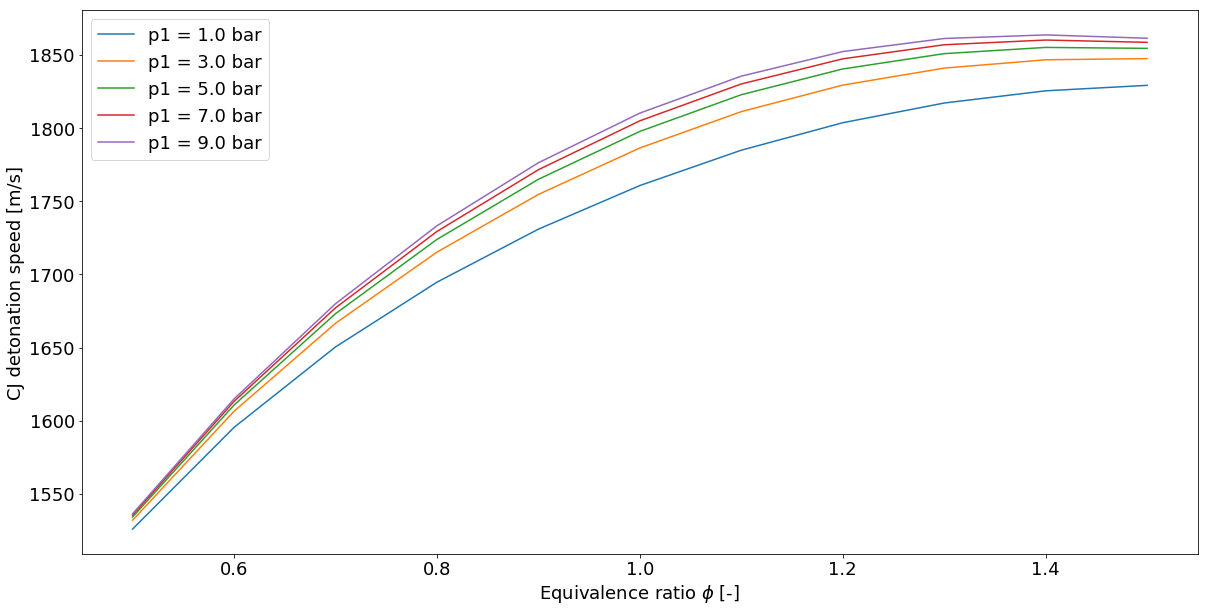

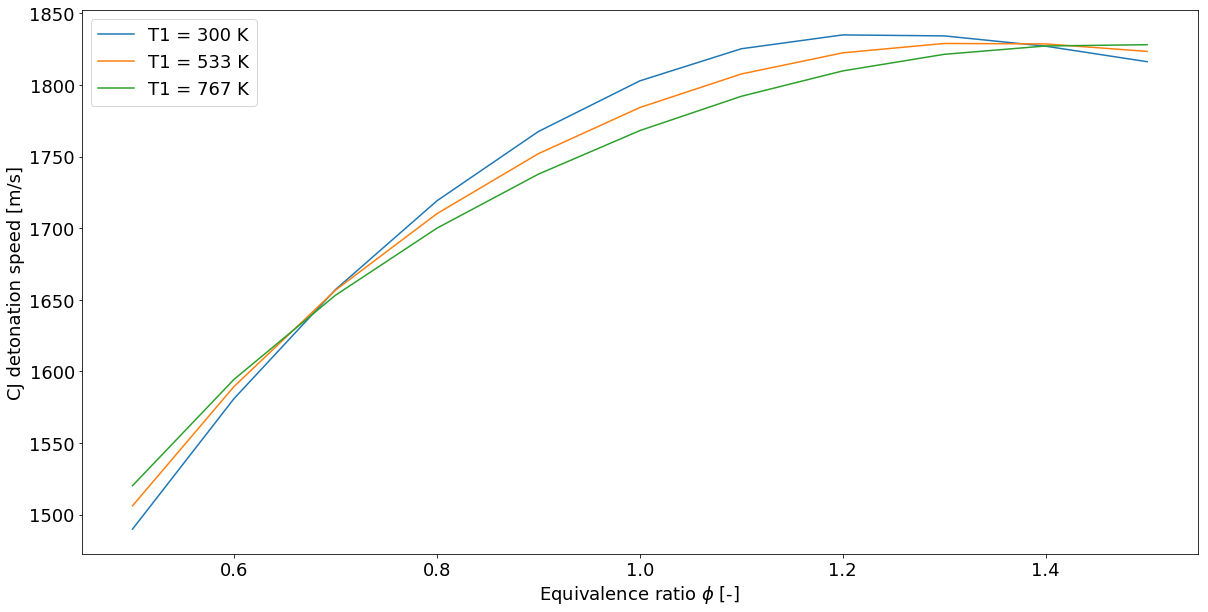

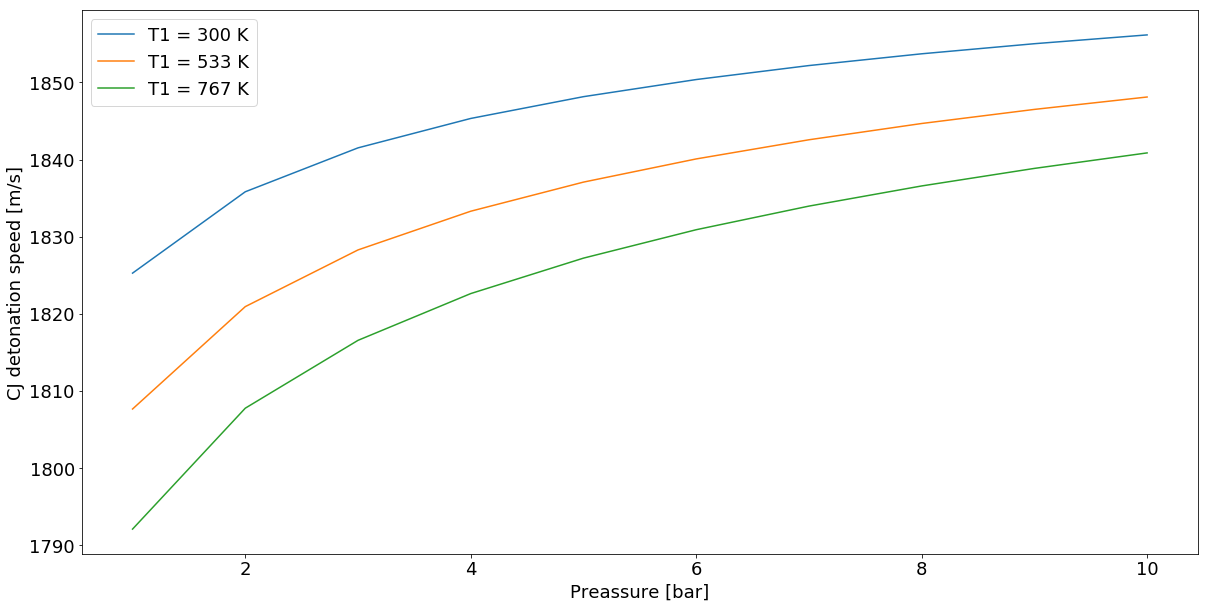

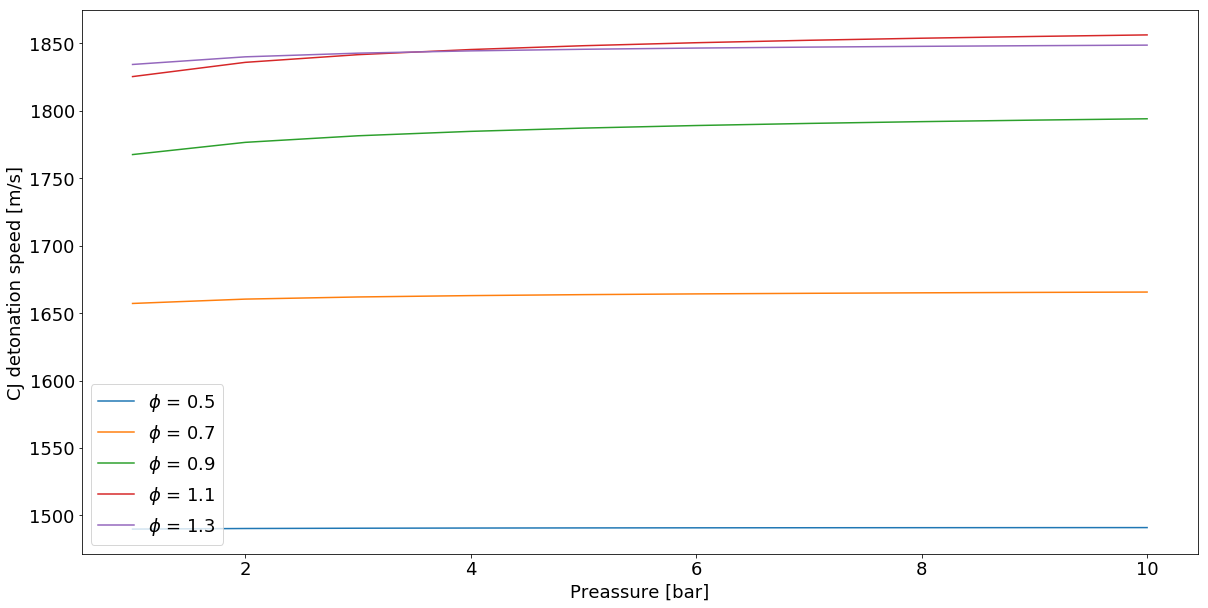

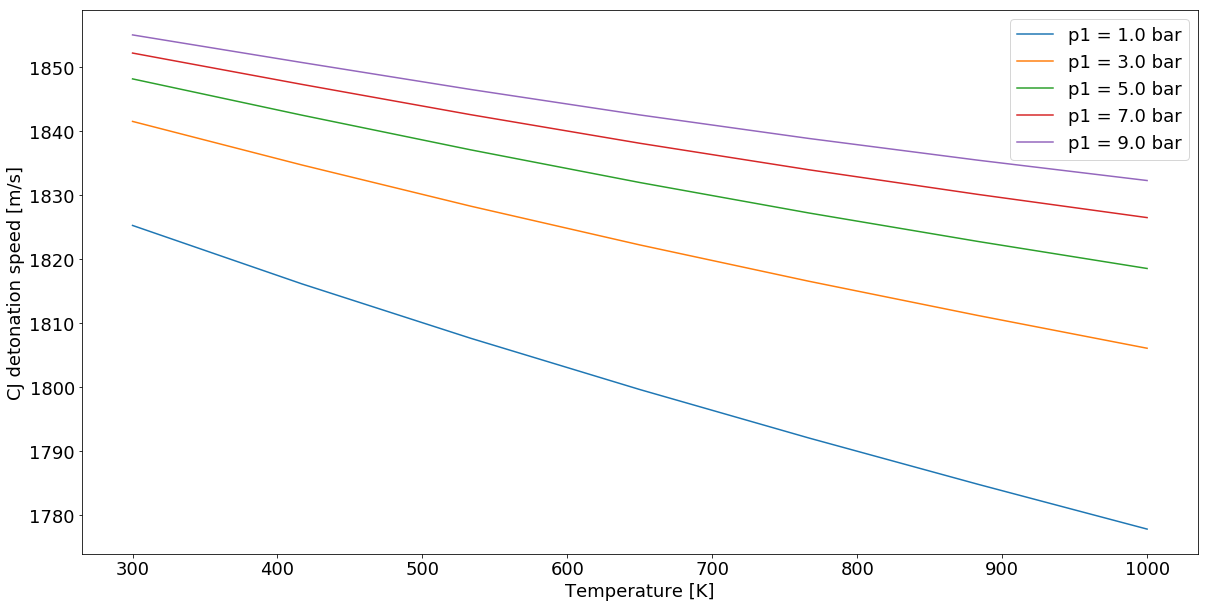

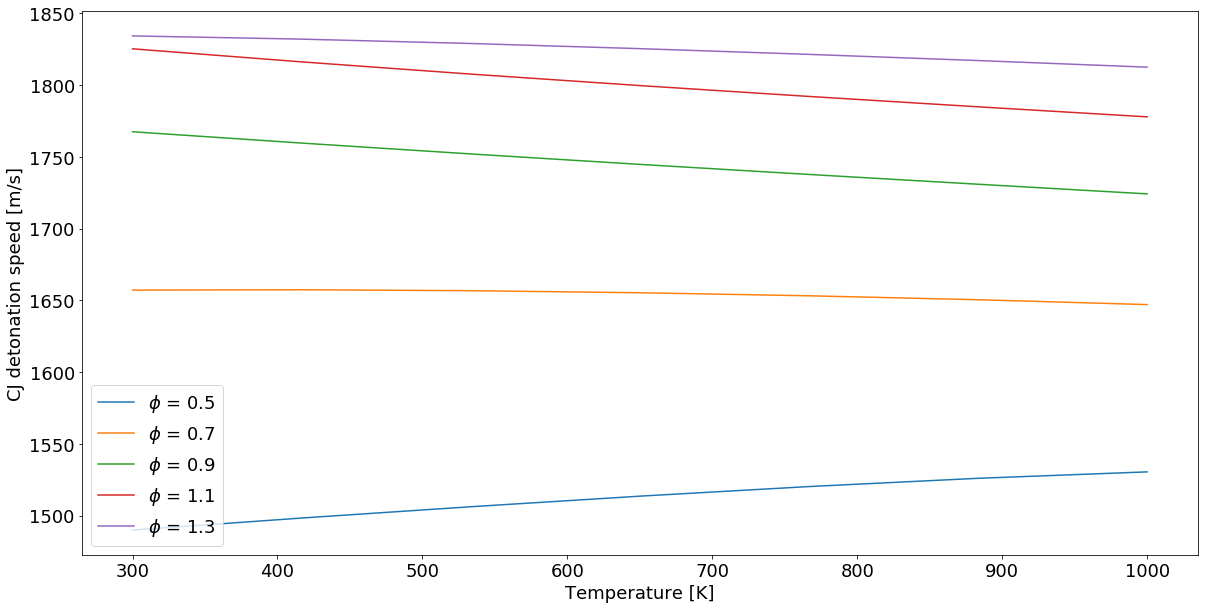

In [6]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(20,10))
for i in range(p_steps/2):
    plt.plot(phi, cj_speed[2*i,5,:], label = 'p1 = %.1f bar' % p1bar[2*i])
    plt.plot()
plt.xlabel('Equivalence ratio $\phi$ [-]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_phi_p1var.png')

plt.figure(figsize=(20,10))
for i in range(T_steps/2):
    plt.plot(phi, cj_speed[0,2*i,:], label = 'T1 = %.0f K' % T1[2*i])
    plt.plot()
plt.xlabel('Equivalence ratio $\phi$ [-]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_phi_T1var.png')

plt.figure(figsize=(20,10))
for i in range(T_steps/2):
    plt.plot(p1bar, cj_speed[:,2*i,6], label = 'T1 = %.0f K' % T1[2*i])
plt.xlabel('Preassure [bar]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_p1_T1var.png')
             
plt.figure(figsize=(20,10))
for i in range(phi_steps/2):
    plt.plot(p1bar, cj_speed[:,0,2*i], label = '$\phi$ = %.1f' % phi[2*i])
plt.xlabel('Preassure [bar]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_p1_phivar.png')

plt.figure(figsize=(20,10))
for i in range(p_steps/2):
    plt.plot(T1, cj_speed[2*i,:,6], label = 'p1 = %.1f bar' % p1bar[2*i])
plt.xlabel('Temperature [K]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_T1_p1var.png')

plt.figure(figsize=(20,10))
for i in range(phi_steps/2):
    plt.plot(T1, cj_speed[0,:,2*i], label = '$\phi$ = %.1f' % phi[2*i])
plt.xlabel('Temperature [K]')
plt.ylabel('CJ detonation speed [m/s]')
plt.title("")
plt.legend()
plt.show()
#plt.savefig('CJU_T1_phivar.png')